# First attempt Project Sigmoid
### Healthcare Diabetes
_project started: 02.08.2024_


I don't have any idea how should i do this.

### Understanding Task

Task: **To train a model that will be able to predict Diabetes**

Firs let's define what is diabetes. A simple google search and wikipedia gives this: [Diabetes](https://www.wikiwand.com/en/Diabetes)

> *Diabetes mellitus, often known simply as diabetes, is a group of common endocrine diseases characterized by sustained high blood sugar levels. Diabetes is due to either the pancreas not producing enough insulin, or the cells of the body becoming unresponsive to the hormone's effects. Classic symptoms include thirst, polyuria, weight loss, and blurred vision. If left untreated, the disease can lead to various health complications, including disorders of the cardiovascular system, eye, kidney, and nerves.*

Characteristics of diabetes:
- endocrine diseases
- high blood sugar
- not producing enough insulin
- cells of the body becoming unresponsive to insuline

Symptoms:
- thirst
- polyuria (peeing a lot >=2.5L a day)
- weight loss
- blurred vision

Consequences:
- cardiovascular system disorders
- eye problems
- kidney dissfunction
  
#### Identify useful data to predict presence of diabetes.

### Provided Data

1. **Id**: Unique identifier for each data entry.
2. **Pregnancies**: Number of times pregnant.
3. **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
4. **BloodPressure**: Diastolic blood pressure (mm Hg).
5. **SkinThickness**: Triceps skin fold thickness (mm).
6. **Insulin**: 2-Hour serum insulin (mu U/ml).
7. **BMI**: Body mass index (weight in kg / height in m^2).
8. **DiabetesPedigreeFunction**: Diabetes pedigree function, a genetic score of diabetes.
9. **Age**: Age in years.
10. **Outcome**: Binary classification indicating the presence (1) or absence (0) of diabetes.
---
### Analyzing dataset:
1. __id__ - don't influence on final result (should not be included in training data)
2. __pregnancy__
	*Does somehow pregnancy disturb endocrine system ?*
	*yes it does.*

	>*Gestational diabetes (GD)*
	>*GD is a transitory condition characterized by chronic hyperglycemia in pregnancy,... *

	[Source: nursingtimes.net](https://www.nursingtimes.net/clinical-archive/womens-health/pregnancy-5-effects-on-the-endocrine-nervous-and-reproductive-systems-02-01-2024/)
	Conclusion pregnancie could be a factor
3. **glucose** (its intuitive)\
4. **blood presure**
	*Does diabetes influence bloodpreasure?*
	*Yes it does.*
	[Source: www.nyp.org](https://www.nyp.org/diabetes-and-endocrinology/diabetes-resource-center/diabetes-and-hypertension)
	>*Diabetes causes damage by scarring the kidneys, which in turn leads to salt and water retention, which in turn raises blood pressure.*
5. **skin thickness**
	*Does diabetes influence skinthickness ?*
	*Yes it does.*
	[Source: www.researchgate.net](https://www.researchgate.net/publication/343418223_Skin_Thickness_can_Predict_the_Progress_of_Diabetes_Type_2_A_New_Medical_Hypothesis)
	> *Diabetes mellitus induces alterations in the metabolism of the macromolecules present in the intercellular matrices and particularly in the basement membranes. These contribute to the morphological changes characteristic of the disease : basement membrane thickening, skin thickening and induration.*
6. **insulin** (its intuitive)
7. **body mass** (its intuitive)
8. **DiabetesPedigreeFunction** (*i guess its have a importance* :) )
9. **Age**
	ages also correlate with the presence of diabetes
	[www.researchgate.net](https://www.researchgate.net/figure/Prevalence-of-diabetes-specified-by-age-groups-and-sex_fig1_280707224)\
	![correlation of age and diabetes](https://www.researchgate.net/profile/Kamal-Gholipour/publication/280707224/figure/fig1/AS:284502246084613@1444842029705/Prevalence-of-diabetes-specified-by-age-groups-and-sex.png)
10. **Outcome**

**In conclusion all the data that the datset provides are usefull except the "Id".**

*to be hones i don't have any idea of how to do that.*

*I asume this is a classification problem.*

In [87]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [88]:
# loading the dataset
import pandas as pd
df = pd.read_csv('Healthcare-Diabetes.csv')

In [89]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [90]:
# checking for nulls
df.isnull().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


*In every example I seen they ploted this big graph although I don't really understand where to look and for what.*

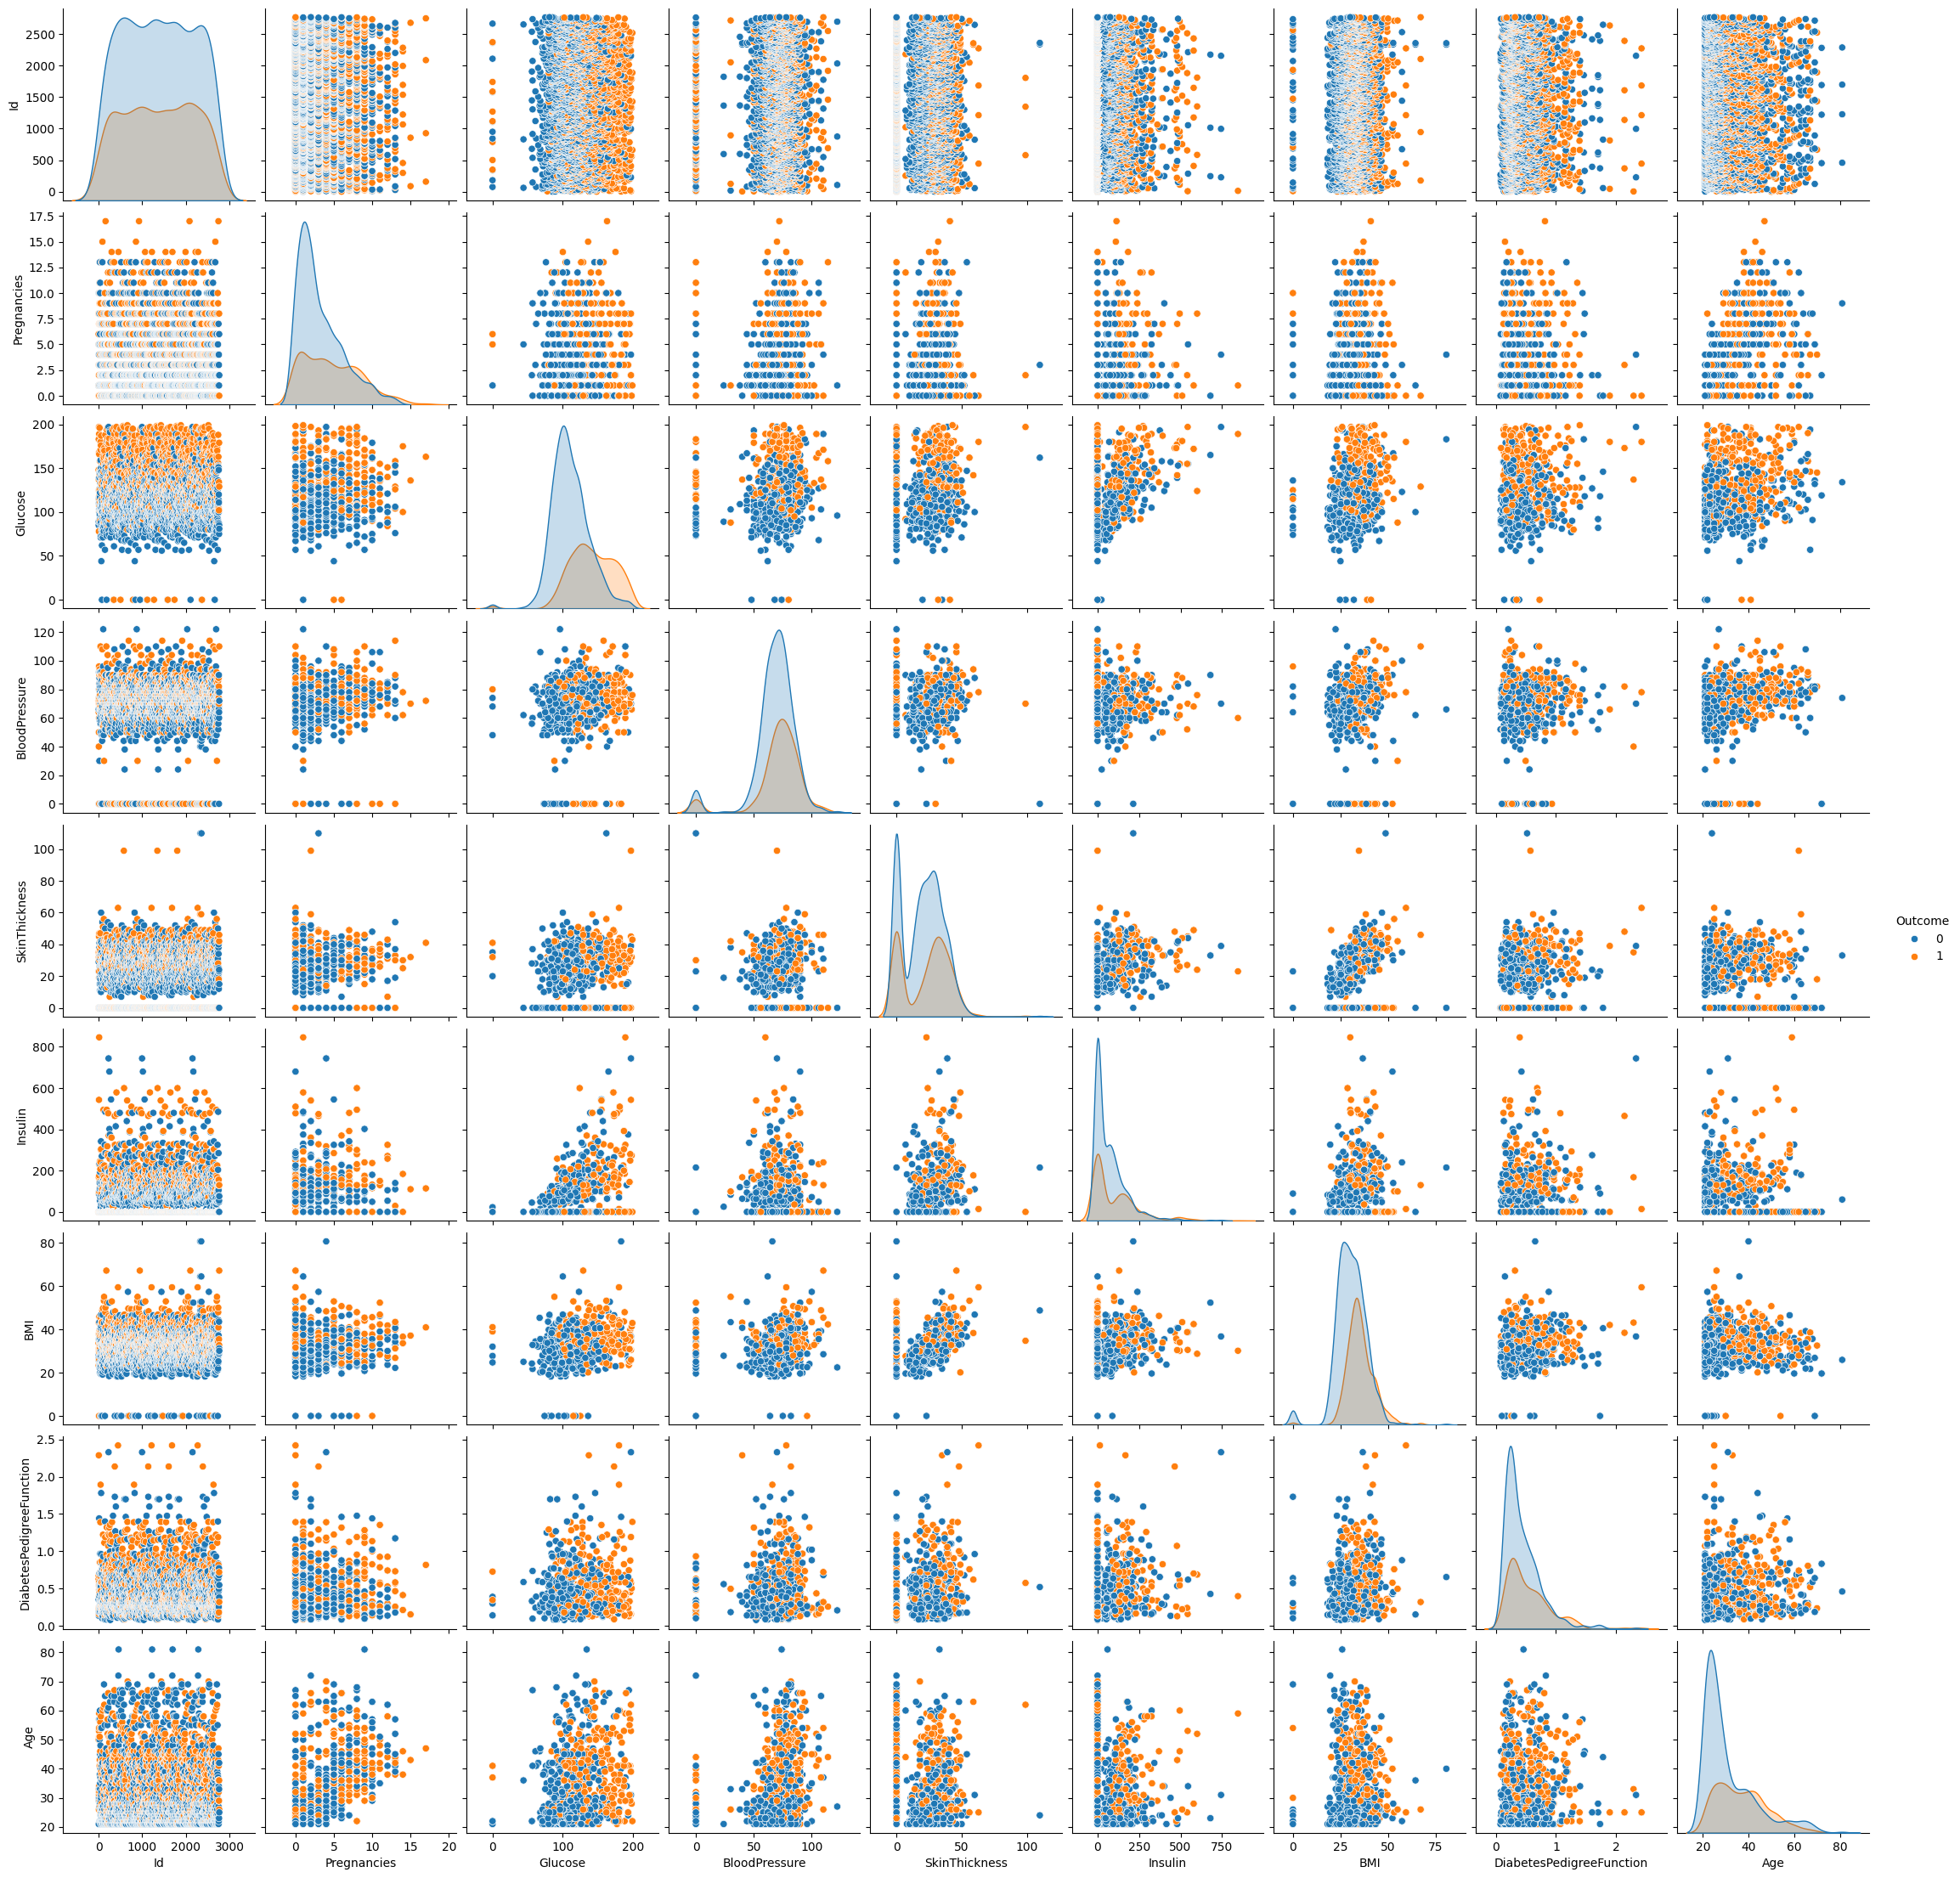

In [109]:
import seaborn as sns
sns.pairplot(df, hue = "Outcome")
# even though every example show this graph I don't understand where to look here

In [92]:
X = df.drop(['Outcome', 'Id'], axis = 1).values
y = df['Outcome'].values

df.drop(['Outcome', 'Id'], axis = 1).head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [94]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [95]:
print(X.shape)
print(y.shape)

(2768, 8)
(2768,)


In [96]:
class ANN_Model(nn.Module):
    def __init__(self, input_features = 8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x


In [97]:
# torch.manual_seed(17)
model = ANN_Model()

In [98]:
# backpropagation defenitions
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [104]:
#model training
epochs = 500
final_losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = loss_fn(y_pred, y_train)
    final_losses.append(loss.item())
    if i % 10 == 0:
        print("Epoch: {}/{}  Loss : {}".format(i, epochs, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0/500  Loss : 0.4993683099746704
Epoch: 10/500  Loss : 0.4983557462692261
Epoch: 20/500  Loss : 0.4971272647380829
Epoch: 30/500  Loss : 0.4959790110588074
Epoch: 40/500  Loss : 0.4948378801345825
Epoch: 50/500  Loss : 0.4938577115535736
Epoch: 60/500  Loss : 0.4927006959915161
Epoch: 70/500  Loss : 0.4916987121105194
Epoch: 80/500  Loss : 0.49079427123069763
Epoch: 90/500  Loss : 0.48966729640960693
Epoch: 100/500  Loss : 0.48867177963256836
Epoch: 110/500  Loss : 0.4878355860710144
Epoch: 120/500  Loss : 0.48680615425109863
Epoch: 130/500  Loss : 0.485934853553772
Epoch: 140/500  Loss : 0.4848748743534088
Epoch: 150/500  Loss : 0.48393186926841736
Epoch: 160/500  Loss : 0.4836283028125763
Epoch: 170/500  Loss : 0.482291042804718
Epoch: 180/500  Loss : 0.48118534684181213
Epoch: 190/500  Loss : 0.4802575707435608
Epoch: 200/500  Loss : 0.479332834482193
Epoch: 210/500  Loss : 0.4784122407436371
Epoch: 220/500  Loss : 0.4775874614715576
Epoch: 230/500  Loss : 0.4768146276473999


Predictions for test data

In [105]:
predictions = []
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_pred = model(data)
    predictions.append(y_pred.argmax().item())
    # print(y_pred.argmax().item())

In [106]:
# Validation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[331,  43],
       [ 50, 130]])

Text(95.72222222222221, 0.5, 'Predicted Values')

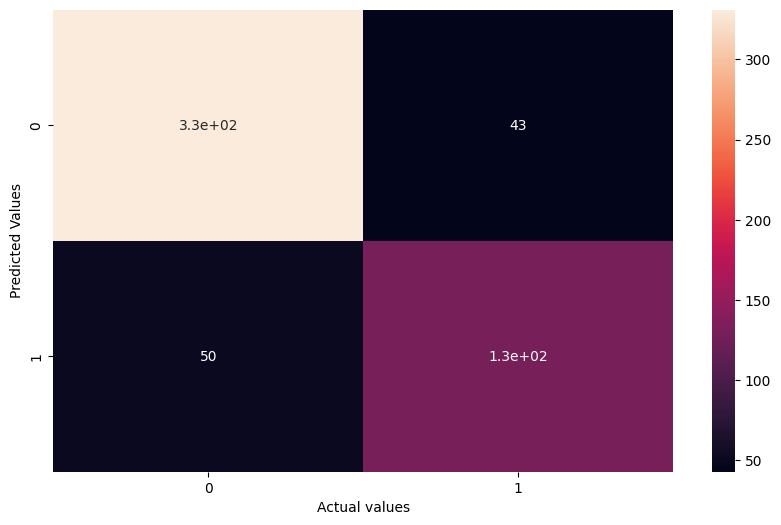

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")

In [108]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print(f"Accurracy: {score * 100:.2f}%")

Accurracy: 83.21%


# Conclusion

